Berner Fachhochschule BFH - MAS Data Science - Graph Machine Learning - Master Thesis FS/2022 Thomas Iten

# 10. Similarity based Graph Link Prediction

**Referenzen**<br />
[1] https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html<br />
[2] Stamile, Marzullo, Deusebio. Graph Machine Learning. Packt Publishing 2021. ISBN 978-1-80020-449-2



In [1]:
from gml.graph.graph_builder import GraphBuilder
from gml.graph.graph_link import GraphLink, Algorithm

## 10.1 Similarity based

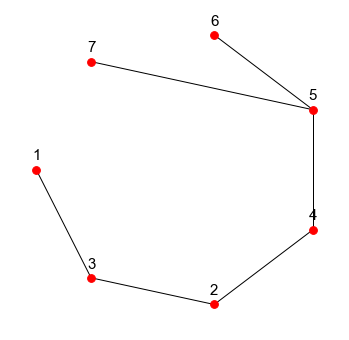

Results:
     Edge        RA        JC        AA  PA
0  (1, 2)  0.500000  0.500000  1.442695   2
1  (2, 5)  0.500000  0.250000  1.442695   6
2  (3, 4)  0.500000  0.333333  1.442695   4
3  (6, 7)  0.333333  1.000000  0.910239   1
4  (1, 4)  0.000000  0.000000  0.000000   2
5  (1, 7)  0.000000  0.000000  0.000000   1

Legend:
  RA  = Resource Allocation Index
  JC  = Jaccard Coefficient
  AA  = Adamic Adar Index
  PA  = Preferential Attachment


In [2]:
edges = [(1,3),(2,3),(2,4),(4,5),(5,6),(5,7)]
graph = GraphBuilder().append_edges(edges).create()
graph.draw()

possible_edges = [(1,2),(2,5),(3,4),(6,7),(1,4),(1,7)]
# possible_edges = graph.missing_edges()

GraphLink(graph, possible_edges)\
    .predict(Algorithm.RESOURCE_ALLOCATION_INDEX)\
    .predict(Algorithm.JACCARD_COEFFICIENT)\
    .predict(Algorithm.ADAMIC_ADAR_INDEX)\
    .predict(Algorithm.PREFERENTIAL_ATTACHMENT)\
    .print_results()

## 10.2 Community based

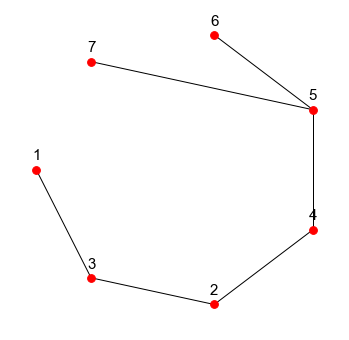

Results:
     Edge  SH        SI      IC        CN
0  (1, 2)   2  0.500000  1000.0  1.500000
1  (2, 5)   1  0.000000     0.0  1.500000
2  (3, 4)   1  0.000000     0.0  1.500000
3  (6, 7)   2  0.333333  1000.0  1.500000
4  (1, 4)   0  0.000000     0.0  0.466667
5  (1, 7)   0  0.000000     0.0  0.280000

Legend:
  SH  = Soundarajan Hopcroft
  SI  = Index Soundarajan Hopcroft
  IC  = Within Inter Cluster
  CN  = Common Neighbor Centrality


In [9]:
edges = [(1,3),(2,3),(2,4),(4,5),(5,6),(5,7)]   # edges
community_0 = (0, [1,2,3])                      # community 0 with list of nodes (belonging to this community)
community_1 = (1, [4,5,6,7])                    # community 1 with list of nodes (belonging to this community)
graph = GraphBuilder()\
    .append_edges(edges)\
    .append_communities([community_0, community_1])\
    .create()
graph.draw()

possible_edges = [(1,2),(2,5),(3,4),(6,7),(1,4),(1,7)]
# possible_edges = graph.missing_edges()

GraphLink(graph, possible_edges)\
    .predict(Algorithm.SOUNDARAJAN_HOPCROFT)\
    .predict(Algorithm.SOUNDARAJAN_HOPCROFT_INDEX)\
    .predict(Algorithm.WITHIN_INTER_CLUSTER)\
    .predict(Algorithm.COMMON_NEIGHBOR_CENTRALITY)\
    .print_results()

---
_The end._